In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('athlete_events.csv') #read dataset

In [43]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [60]:
df_new=df.copy()

#Handling Missing Values (replace them with the mean)
df_new['Age']=df_new['Age'].fillna(df_new['Age'].mean()) 
df_new['Height']=df_new['Height'].fillna(df_new['Height'].mean())
df_new['Weight']=df_new['Weight'].fillna(df_new['Weight'].mean())
df_new['Medal']=df_new['Medal'].fillna('No Medal') #say 'No Medal' for missing medal entry

df_new.to_csv('athlete_events_cleaned.csv')

#Check Again
df_new.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [45]:
print('Mean:',df_new['Age'].mean()) #25.56
print('Max:',df_new['Age'].max()) #97
print('Min:',df_new['Age'].min()) #10
print('Median:',df_new['Age'].median()) #25

Mean: 25.556898357297378
Max: 97.0
Min: 10.0
Median: 25.0


In [46]:
df_new["Age"].value_counts().head(10) #We see the top 10 ages to compete in the Olympics by quantity

Age
23.0    21875
24.0    21720
22.0    20814
25.0    19707
21.0    19164
26.0    17675
27.0    16025
20.0    15258
28.0    14043
19.0    11643
Name: count, dtype: int64

In [47]:
Dev_GDP=df_new.groupby('Age')['Medal'].value_counts() #total medals by age
print(Dev_GDP)

Age   Medal   
10.0  Bronze       1
11.0  No Medal    12
      Silver       1
12.0  No Medal    33
      Bronze       3
                  ..
81.0  No Medal     2
84.0  No Medal     1
88.0  No Medal     3
96.0  No Medal     1
97.0  No Medal     1
Name: count, Length: 242, dtype: int64


In [48]:
print('Mean:',df_new2['Height'].mean()) #25.56
print('Max:',df_new2['Height'].max()) #97
print('Min:',df_new2['Height'].min()) #10
print('Median:',df_new2['Height'].median()) #25

Mean: 178.4802217879633
Max: 223.0
Min: 136.0
Median: 177.0


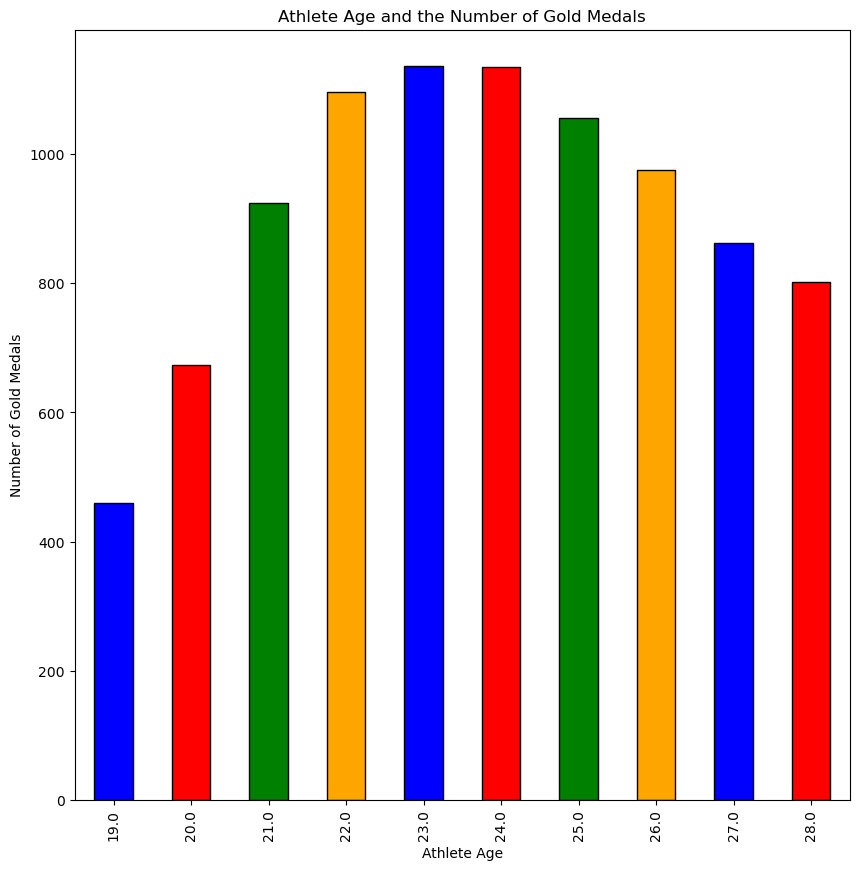

In [50]:
df_new2 = df_new.copy() #This dataset was used for all visualizations

dropped_rows = df_new2[df_new2['Medal'] != "Gold"].index #drop participants that didn't earn a gold medal
df_new2.drop(dropped_rows, inplace=True) #drops rows specified in dropped_rows variable

dropped_rows = df_new2[df_new2['Age'] < 19].index ##drop participants that are less than 19
df_new2.drop(dropped_rows, inplace=True) #drops rows specified in dropped_rows variable

dropped_rows = df_new2[df_new2['Age'] > 28].index #drop participants that are greater than 28
df_new2.drop(dropped_rows, inplace=True) #drops rows specified in dropped_rows variable


#missing values were dropped
dropped_rows = df_new2[df_new2['Age'] ==df['Age'].mean() ].index #drop participants that didn't have an age listed (replaced by mean)
df_new2.drop(dropped_rows, inplace=True) #drops rows specified in dropped_rows variable

Dev_GDP=df_new2.groupby('Age')['Medal'].count() #number of gold medals by age
#print(Dev_GDP)

#plotting parameters
plt.figure(figsize=(10,10)) #graph size
Dev_GDP.plot(kind='bar',color=['blue','red','green','orange'],edgecolor='black') #graph groupby function
plt.title("Athlete Age and the Number of Gold Medals")
plt.xlabel("Athlete Age")
#plt.ylim(0, 10)
plt.ylabel("Number of Gold Medals")
plt.savefig("Visual1.jpg")
plt.show()



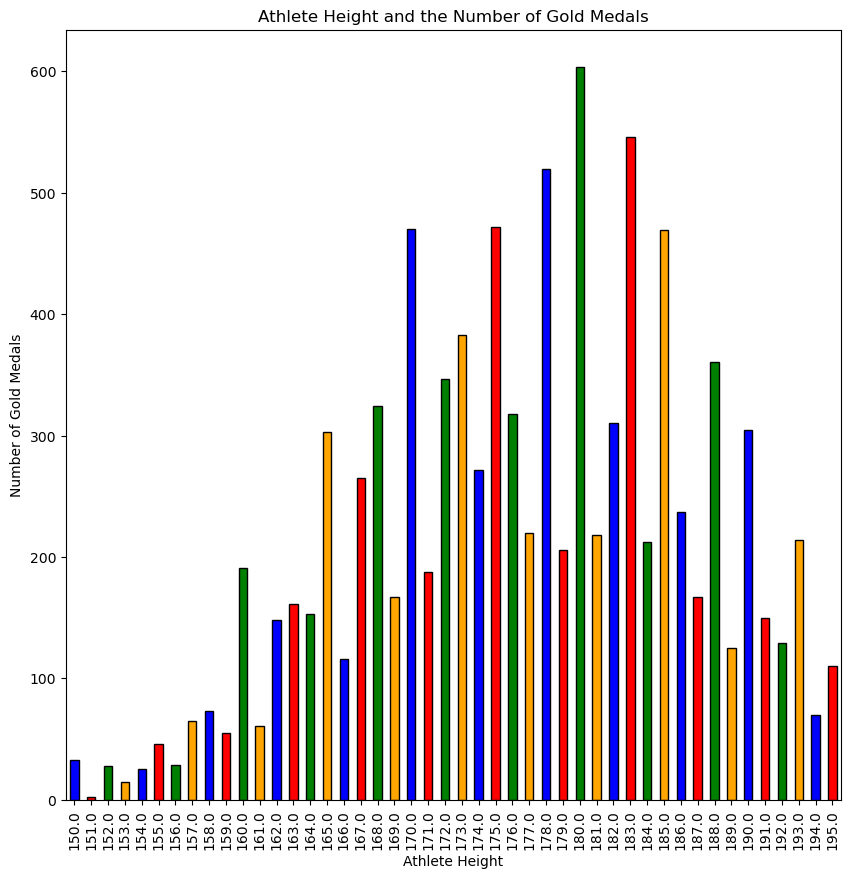

In [51]:
df_new2 = df_new.copy()

dropped_rows = df_new2[df_new2['Medal'] != "Gold"].index #drop participants that didn't earn a gold medal
df_new2.drop(dropped_rows, inplace=True) #drops rows specified in dropped_rows variable

dropped_rows = df_new2[df_new2['Height'] < 150].index ##drop participants that are less than 150
df_new2.drop(dropped_rows, inplace=True) #drops rows specified in dropped_rows variable

dropped_rows = df_new2[df_new2['Height'] > 195].index #drop participants that are greater than 195
df_new2.drop(dropped_rows, inplace=True) #drops rows specified in dropped_rows variable

#drop missing values
dropped_rows = df_new2[df_new2['Height'] ==df['Height'].mean() ].index 
df_new2.drop(dropped_rows, inplace=True) #drops rows specified in dropped_rows variable

Dev_GDP=df_new2.groupby('Height')['Medal'].count() #number of gold medals by age
#print(Dev_GDP)
plt.figure(figsize=(10,10))
Dev_GDP.plot(kind='bar',color=['blue','red','green','orange'],edgecolor='black')
plt.title("Athlete Height and the Number of Gold Medals")
plt.xlabel("Athlete Height")
plt.ylabel("Number of Gold Medals")
plt.savefig("Visual2.jpg")
plt.show()

In [52]:
#df_new2 = df_new.copy()
Most_Gold_By_Team=df_new2.groupby('Team')['Medal'].value_counts().sort_values(ascending=False).head(5) #show top 5 teams by number of gold medals
print(Most_Gold_By_Team)

Team           Medal
United States  Gold     1982
Soviet Union   Gold      924
Germany        Gold      494
East Germany   Gold      351
Italy          Gold      345
Name: count, dtype: int64


In [53]:
#df_new2[('United States')['Medal']].count()
df_new2['Team'].value_counts()['Soviet Union'] #show the number of gold medals for a specific team


924

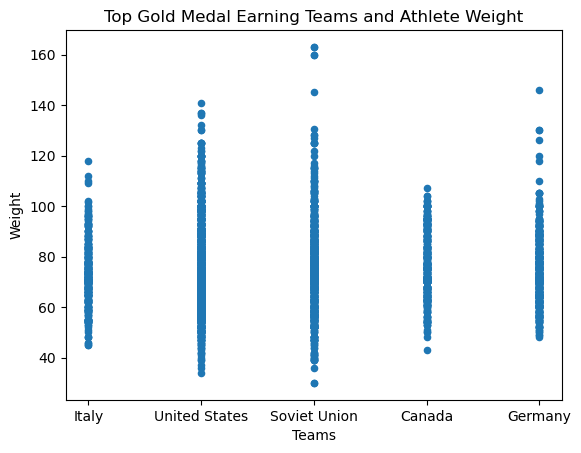

In [55]:
df_new2.plot.scatter(x='Team', y='Weight') #teams on x-axis, weight on the y-axis
plt.title("Top Gold Medal Earning Teams and Athlete Weight")
plt.ylabel("Weight")
plt.xlabel("Teams")
plt.savefig("Visual3.jpg")

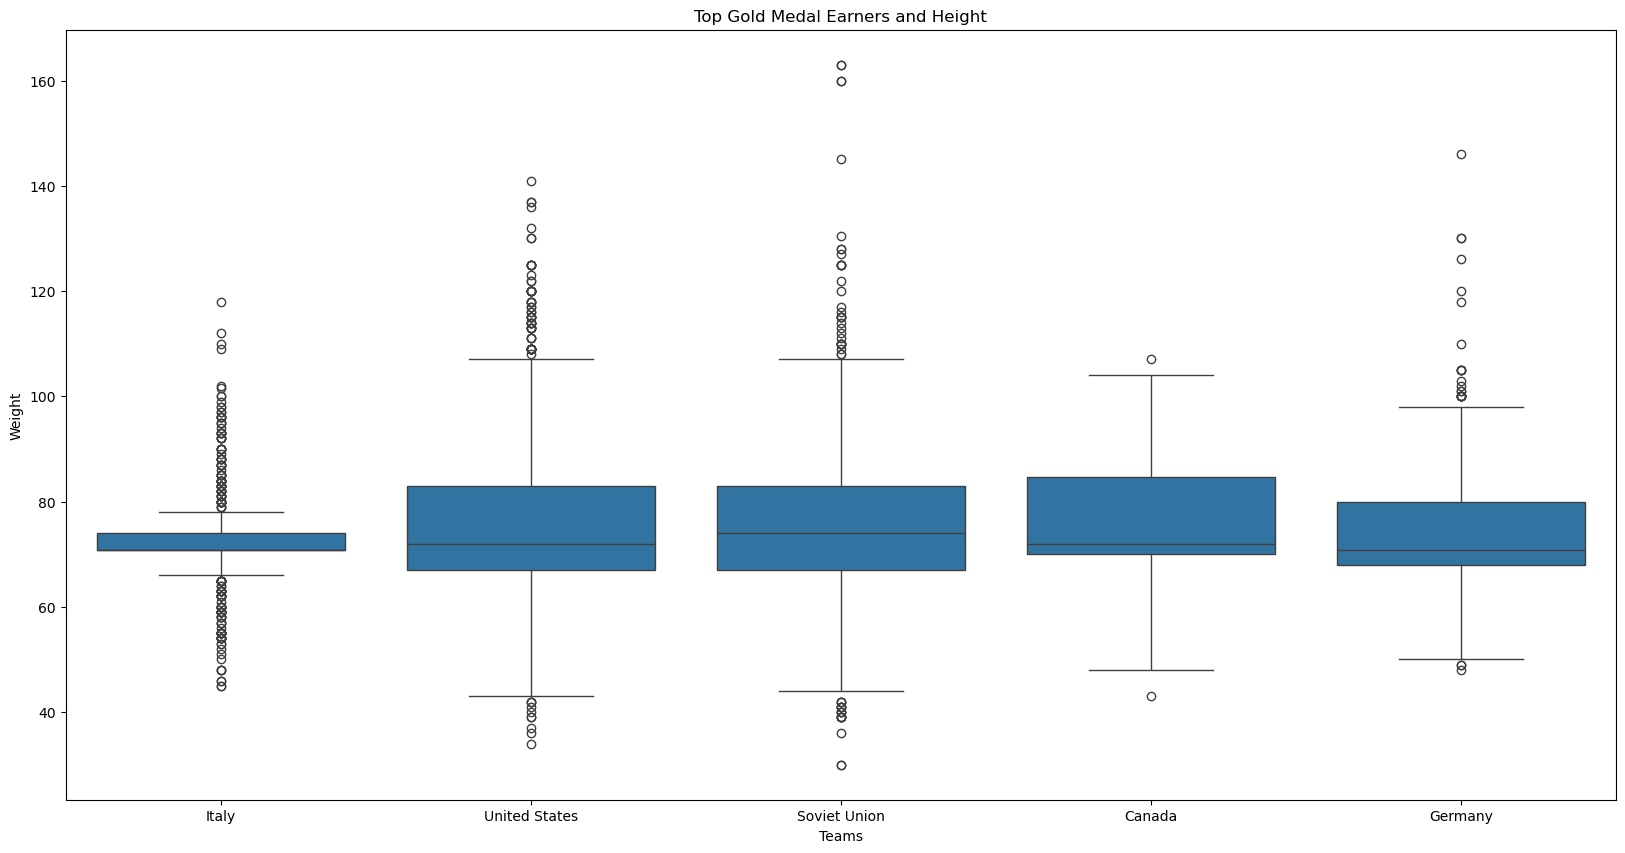

In [56]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_new2, x='Team', y='Weight') #teams on x-axis, weight on the y-axis
plt.title("Top Gold Medal Earners and Height")
plt.xlabel("Teams")
plt.ylabel("Weight")
plt.savefig("Visual3b.jpg")
plt.show()

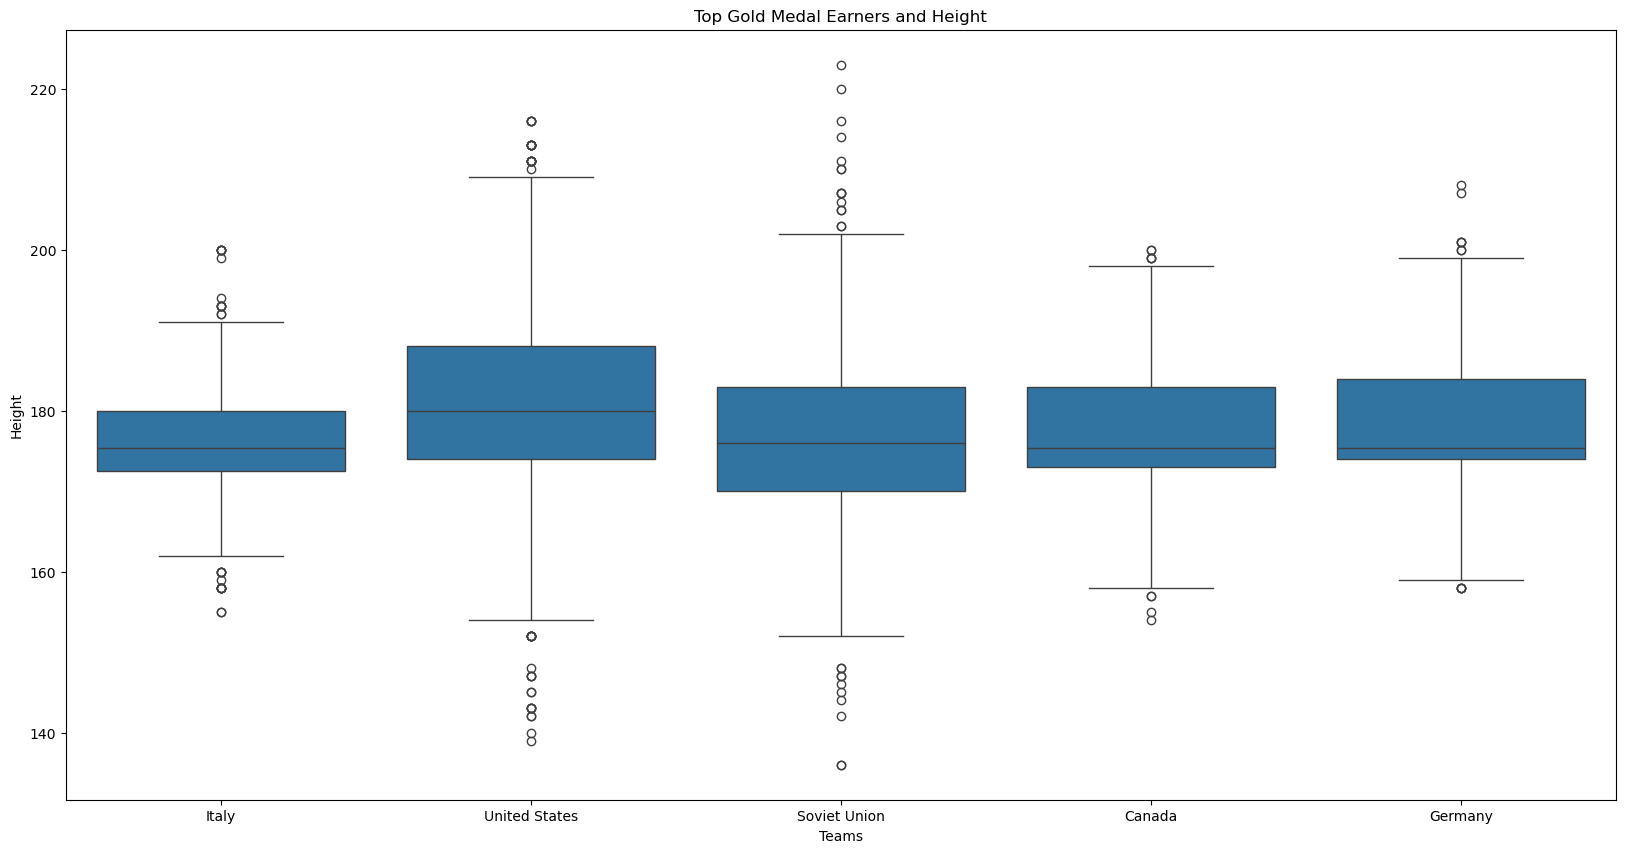

In [57]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_new2, x='Team', y='Height') #teams on x-axis, weight on the y-axis
plt.title("Top Gold Medal Earners and Height")
plt.xlabel("Teams")
plt.ylabel("Height")
plt.savefig("Visual4.jpg")
plt.show()

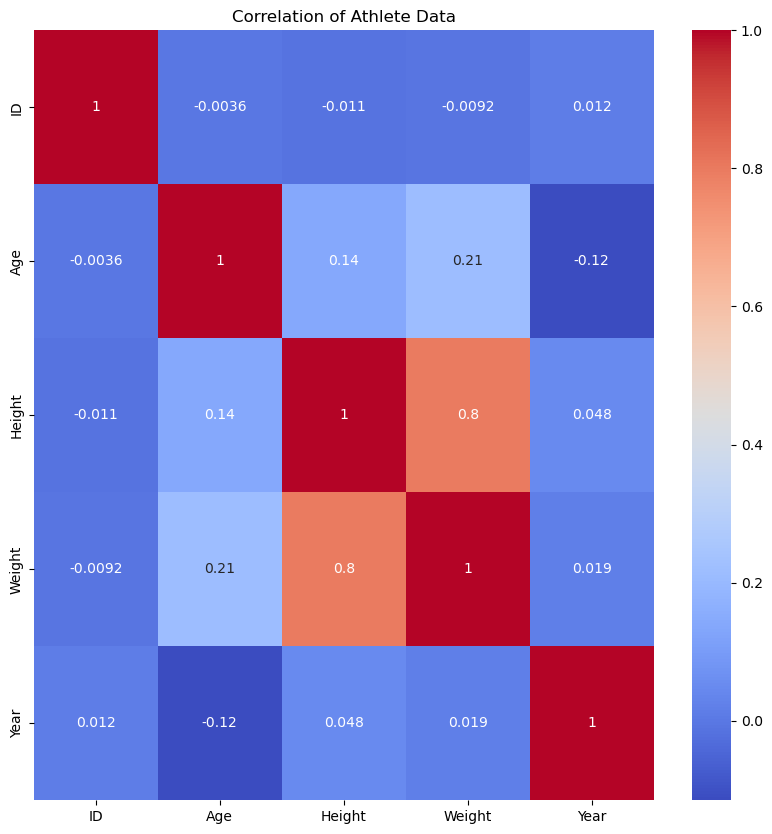

In [58]:
plt.figure(figsize=(10,10))
df_cor2 = df.corr(numeric_only=True) #.corr of original dataset was used 
sns.heatmap(df_cor2, annot=True, cmap='coolwarm')
plt.title("Correlation of Athlete Data")
plt.savefig("Visual5.jpg")
plt.show()


In [198]:
df_new["Age"].value_counts()
df.shape
df.loc[3,'Medal']

'Gold'

In [38]:
df_new

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.00000,89.000000,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal
271112,135570,Piotr ya,M,27.0,176.00000,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal
271113,135570,Piotr ya,M,27.0,176.00000,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal
271114,135571,Tomasz Ireneusz ya,M,30.0,185.00000,96.000000,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal
